In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## TITANIC

DATASET: https://www.kaggle.com/datasets/yasserh/titanic-dataset 

This data are about sinking of the Titanic.

In [46]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Meaning of indexes
* Survived: 1-yes, 0-no
* Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp: No. of siblings / spouses aboard the Titanic
* Parch No. of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: price
* Embarked: port

In [47]:
data.shape

(891, 12)

 This data have 891 records and 12 attributes.

In [48]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This data set has some missing values. For example, we don't have information about the ages of 177 people, in 687 records we are missing data about cabin numbers.

In [49]:
print(data.keys())

categorical_df = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin','Embarked']
numerical_df = ['Age', 'SibSp', 'Parch', 'Fare']


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Categorical vs numerical variables
* Numerical variables are this witch have arithmetical sense In here we have for example age of the passenger or fare.
* Categorical variables don't have mathematical sense eg. ticket class or passenger name.

### Description of numerical data

In [50]:
data[numerical_df].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200



In the count row, we can see that we haven't all data in age column.

The standart deviation of SibSp and Parch is not meaningful because we can't have not natural number of people. Also in mean row we have the same problem. Percentiles about this rows aren't also meaningfull because in most cases we have 0, it's because there not many people traveling with family.
More about these particular columns we can tell using min or max values. 

The Min row shows the minimum value in the set, thanks to this we can find that in our set we have passangers traveling without family, or that fare in some cases was equal to 0.

Min and max values show us also age range of passangers. The oldest person on board have had 80 years, the youngest less then half a year.
When you looking at this rows intresting is also range of fare: 0-512.

## Plots


Text(0, 0.5, 'Fare')

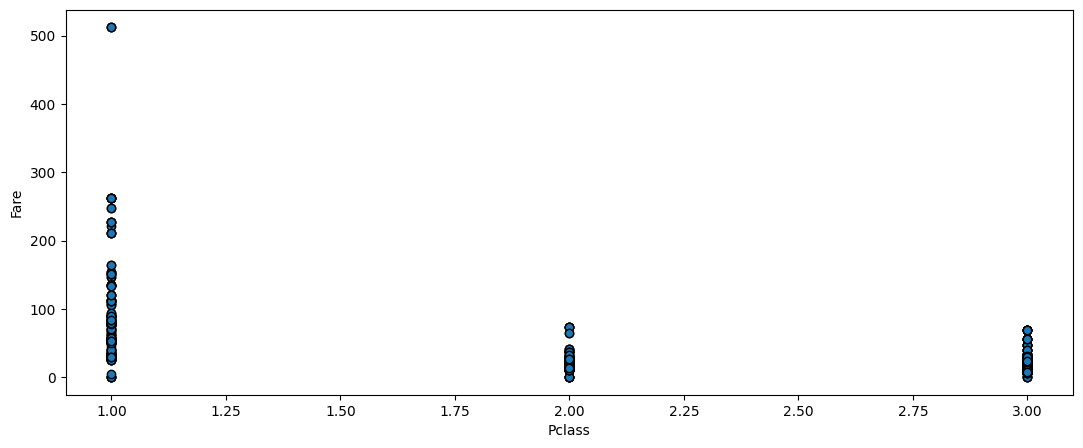

In [51]:
plt.scatter(data["Pclass"], data["Fare"], edgecolor='black')
# plt.bar(data["Pclass"], data["Fare"], edgecolor='black',color='none')
plt.xlabel("Pclass")
plt.ylabel("Fare")

From the plot, we can conclude that fare and ticket class are correlated. The better the class is, the higher price could be.

<AxesSubplot: title={'center': 'Fare'}, xlabel='Pclass'>

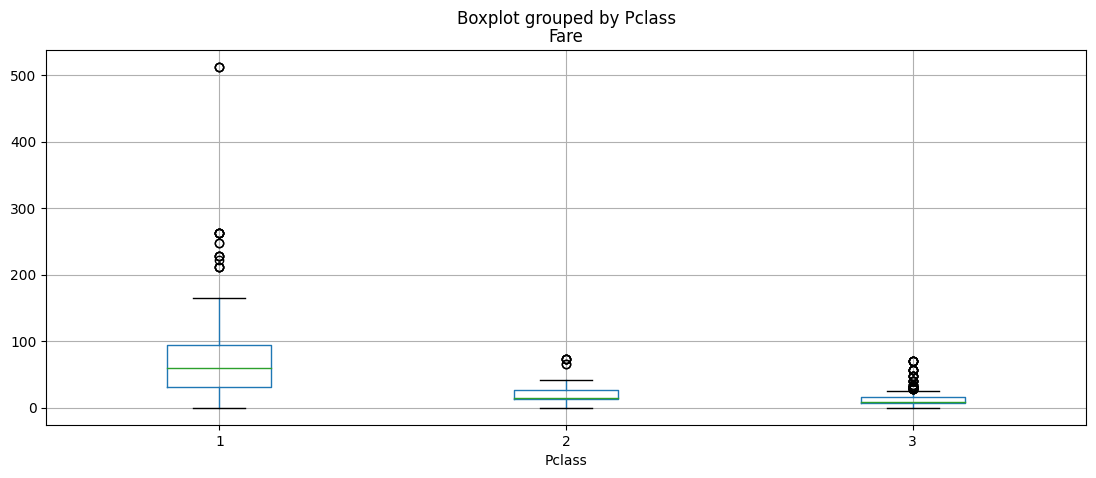

In [52]:
data.boxplot(column =['Fare'], by='Pclass')
  

This is the same plot but in boxplot representation.

Text(0, 0.5, 'Fare')

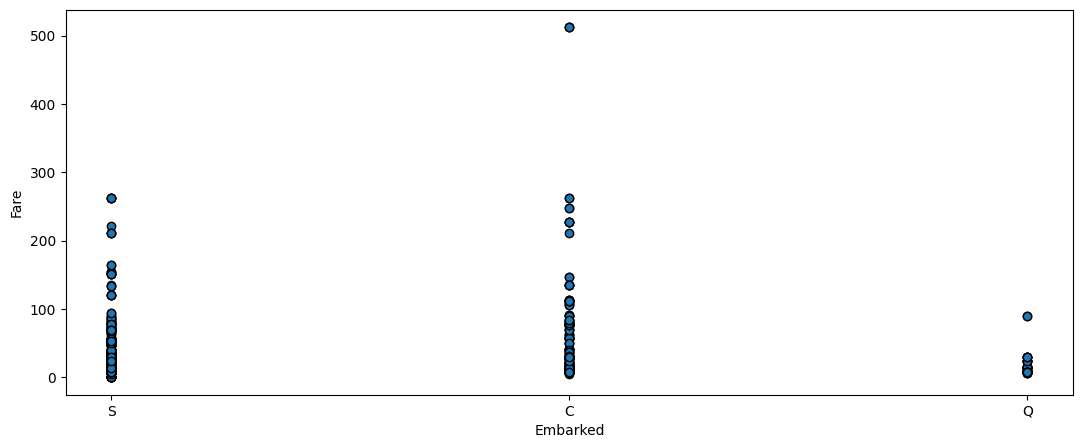

In [53]:
#delete rows with empty Embarked
clean_data = data.loc[(data["Embarked"]=='C')|(data["Embarked"]=='S')|(data["Embarked"]=='Q')]

plt.scatter(clean_data["Embarked"], clean_data["Fare"], edgecolor='black')
plt.xlabel("Embarked")
plt.ylabel("Fare")

In this plot, we can see that Embarked and Fare are also correlated. In port Q the fare was the lowest. In this plot, we can't certainly tell if the range of fare is bigger in C or S, so I'll use a boxplot.

<AxesSubplot: title={'center': 'Fare'}, xlabel='Embarked'>

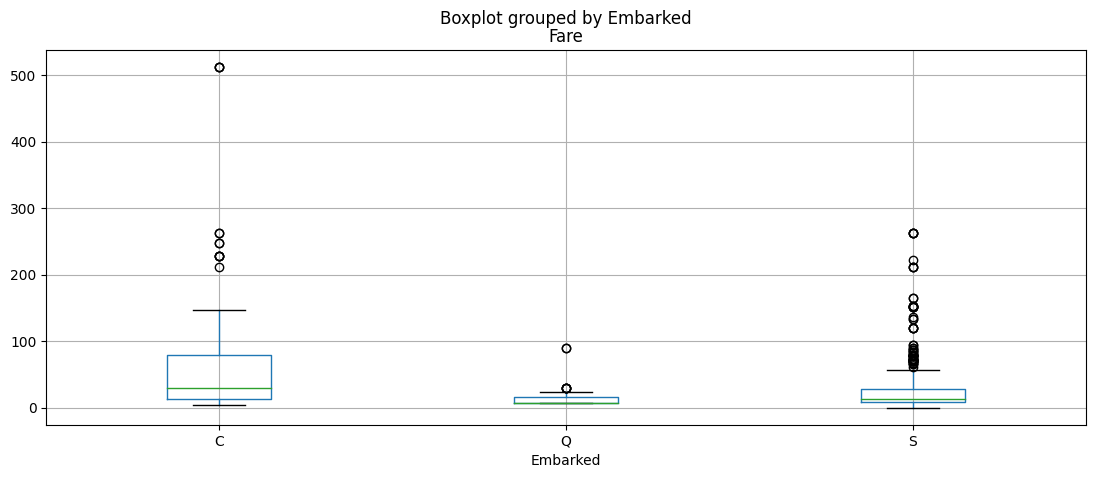

In [54]:
clean_data.boxplot(column =['Fare'], by='Embarked')


Here we clearly see that range of fare is bigger in C than S.

<AxesSubplot: title={'center': 'Fare'}, xlabel='Survived'>

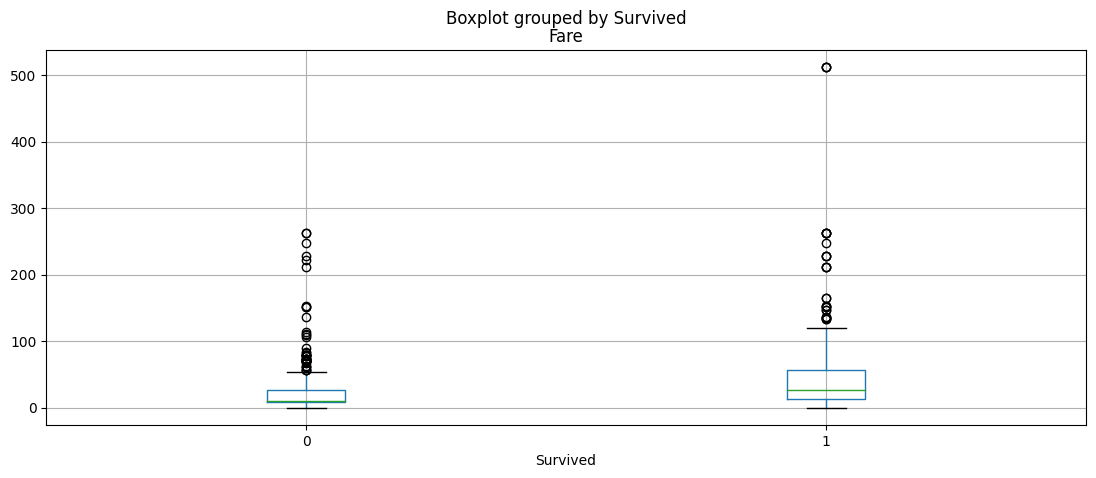

In [55]:
data.boxplot(column =['Fare'], by='Survived')

More people from survived set have paid bigger fare.

<AxesSubplot: title={'center': 'Age'}, xlabel='Pclass'>

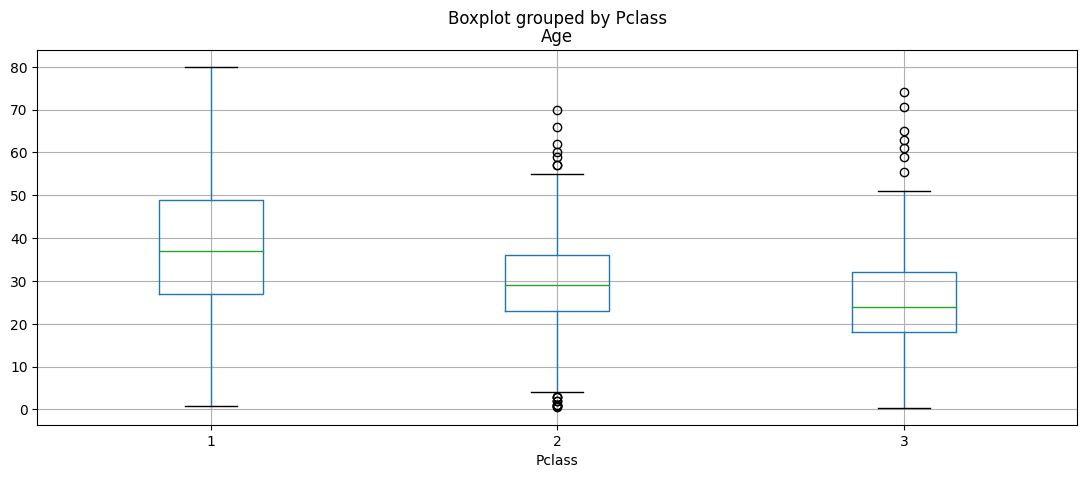

In [56]:
data.boxplot(column =['Age'], by='Pclass')

On this boxplot we can see that first class ticket have had people from evry age group.
Second class, people from range mainly 5-55 years, so a younger group. And in the third class was people again a little younger. 

<AxesSubplot: xlabel='SibSp', ylabel='Parch'>

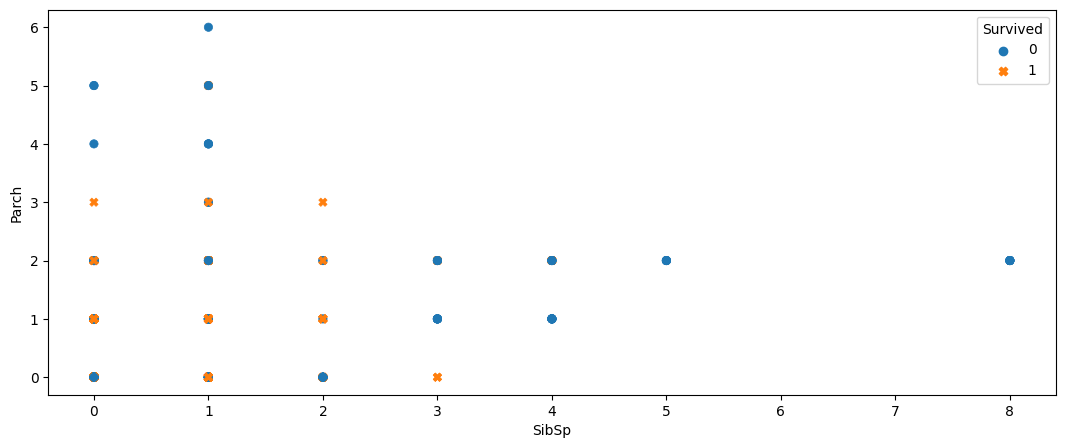

In [57]:
import seaborn
seaborn.scatterplot(data=data,x=data['SibSp'],y=data['Parch'], hue= data['Survived'],marker='x', style='Survived')

In this plot on the x-axis, we have the number of siblings/spouses aboard, and on the y-axis, we have the number of parents/children aboard.
We also have color information about survival.

We can see that people who survived are concentrated in the lower left corner, these are people with not that big families aboard. 

### Mosaic plots

(<Figure size 900x600 with 3 Axes>,
 {('3', '0'): (0.0, 0.0, 0.5456101165672124, 0.7551204065200181),
  ('3', '1'): (0.0,
   0.7584426656562308,
   0.5456101165672124,
   0.2415573343437692),
  ('1', '0'): (0.5505606116167173,
   0.0,
   0.24002400240024002,
   0.3691399040236249),
  ('1', '1'): (0.5505606116167173,
   0.37246216315983754,
   0.24002400240024002,
   0.6275378368401624),
  ('2', '0'): (0.7955351090664623,
   0.0,
   0.20446489093353776,
   0.5254225046944966),
  ('2', '1'): (0.7955351090664623,
   0.5287447638307091,
   0.20446489093353776,
   0.4712552361692907)})

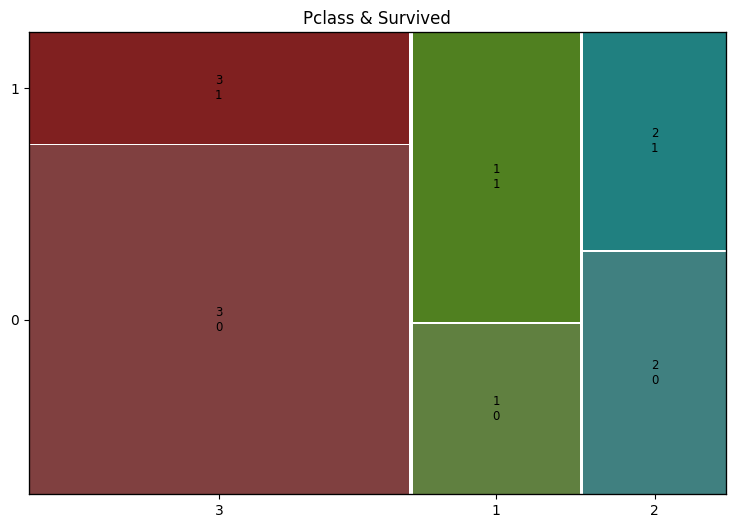

In [58]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rc("figure", figsize=(9,6))
mosaic(data, ['Pclass','Survived'], title="Pclass & Survived")

Here we have a mosaic plot about the relation between the class of ticket and survival.
The biggest part of the plot takes people from the 3rd class who didn't survive.
In the 1st class, most people survived. In the 2nd class, the ratio of survivors and not is almost the same.

(<Figure size 900x600 with 3 Axes>,
 {('male', '0'): (0.0, 0.0, 0.6443651551445914, 0.8083971970957582),
  ('male', '1'): (0.0,
   0.8117194562319708,
   0.6443651551445914,
   0.1882805437680291),
  ('female', '0'): (0.6493402795227009,
   0.0,
   0.35065972047729926,
   0.25710476754766487),
  ('female', '1'): (0.6493402795227009,
   0.2604270266838775,
   0.35065972047729926,
   0.7395729733161224)})

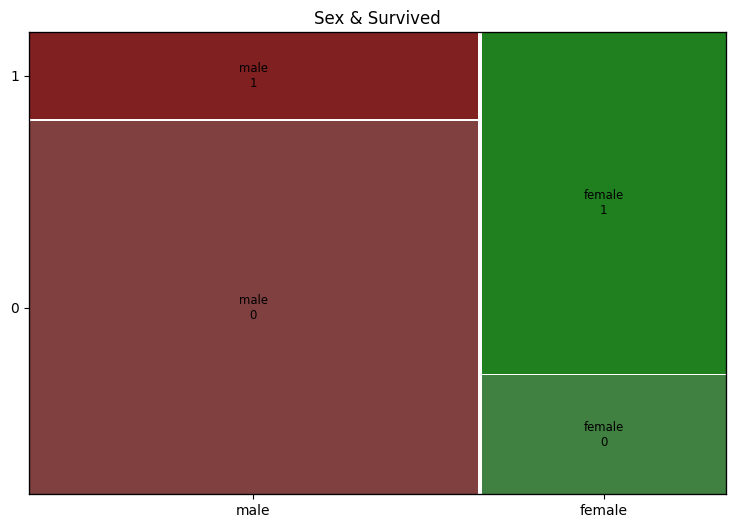

In [59]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rc("figure", figsize=(9,6))
mosaic(data, ['Sex','Survived'], title="Sex & Survived")


This mosaic plot shows the relationship between gender and survival.

On the ship, most parts of the passengers were men and more of them dead in catastrophe than survive.
Among women more have survived.

---
### Number of family members aboard

In [60]:
numOfFamilyMembers = []
for i in range(0,len(data.index)):
  numOfFamilyMembers.append(data["SibSp"].values[i] + data["Parch"].values[i])
  
data["numOfFamilyMembers"] = numOfFamilyMembers;
sorted = data.sort_values(["numOfFamilyMembers"], ascending=False)
sorted.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,numOfFamilyMembers
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.550,NaN,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.550,NaN,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.550,NaN,S,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S,10
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.550,NaN,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.550,NaN,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.550,NaN,S,10
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.900,NaN,S,7
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,NaN,S,7
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900,NaN,S,7


I add a new column "numOfFamilyMembers" which is the sum of the number of siblings/spouses and parents/children aboard. Here we can see a piece of data set sorted by this new column. We can see that at first we have people with 10 family members and they all are from the same family with the surname Sage.

<AxesSubplot: xlabel='numOfFamilyMembers', ylabel='count'>

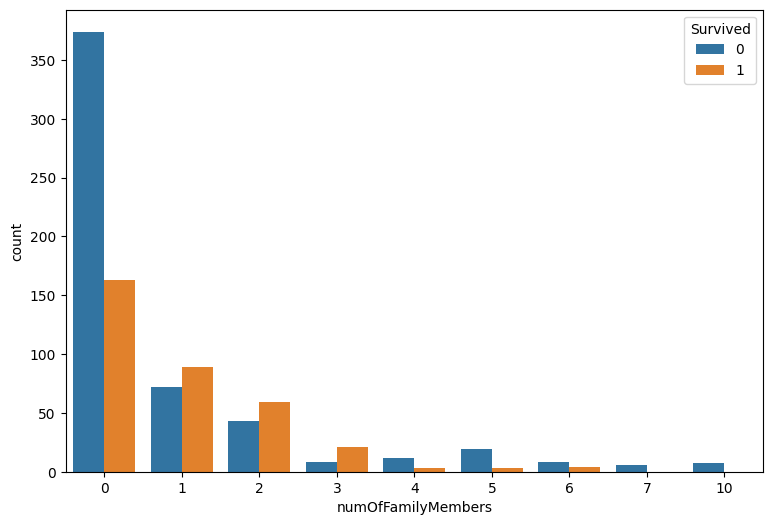

In [61]:
sns.countplot(x ='numOfFamilyMembers', hue='Survived',data=data)

From this plot, we can conclude that most people hadn't had family aboard.
More passengers with 1, 2 or 3 family members have survived, than not survived.
When the number of family members was greater than 3, more people didn't survive.

---

### Survival of children (1-10 years)

(<Figure size 900x600 with 3 Axes>,
 {('2.0', '0'): (0.0, 0.0, 0.20128824476650561, 0.6976744186046511),
  ('2.0', '1'): (0.0,
   0.7009966777408636,
   0.20128824476650561,
   0.29900332225913623),
  ('4.0', '0'): (0.20611916264090174,
   0.0,
   0.20128824476650561,
   0.2990033222591362),
  ('4.0', '1'): (0.20611916264090174,
   0.3023255813953488,
   0.20128824476650561,
   0.6976744186046511),
  ('8.0', '0'): (0.4122383252818035,
   0.0,
   0.08051529790660222,
   0.4983388704318937),
  ('8.0', '1'): (0.4122383252818035,
   0.5016611295681063,
   0.08051529790660222,
   0.4983388704318937),
  ('3.0', '0'): (0.49758454106280187,
   0.0,
   0.12077294685990336,
   0.1661129568106312),
  ('3.0', '1'): (0.49758454106280187,
   0.16943521594684383,
   0.12077294685990336,
   0.8305647840531561),
  ('7.0', '0'): (0.6231884057971013,
   0.0,
   0.06038647342995168,
   0.6644518272425248),
  ('7.0', '1'): (0.6231884057971013,
   0.6677740863787375,
   0.06038647342995168,
   0.33222591362

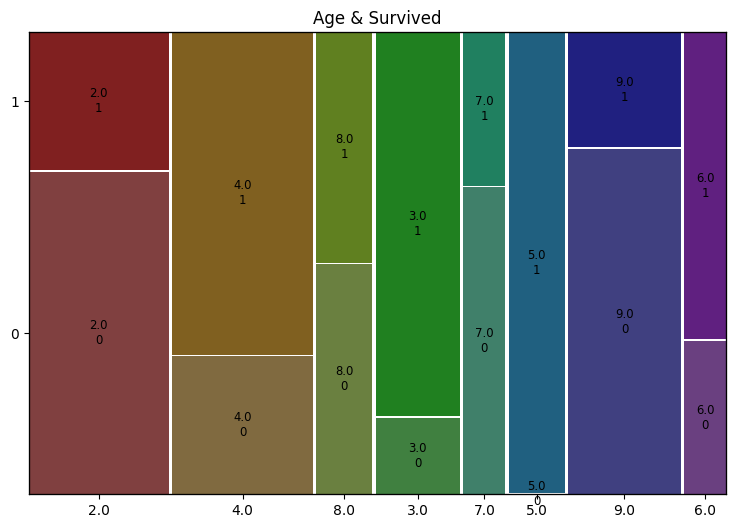

In [62]:
children = data.loc[(data['Age']<10) & (data['Age']>1)]

mosaic(children, ['Age','Survived'], title="Age & Survived")

This mosaic plot shows the distribution of survival in different ages among children between 1 and 10 years. 

All 5 years old survived. Later most children survived in 3 years old group. most of the 2 and 9 year old groups didn't survive.

Text(0, 0.5, 'Fare')

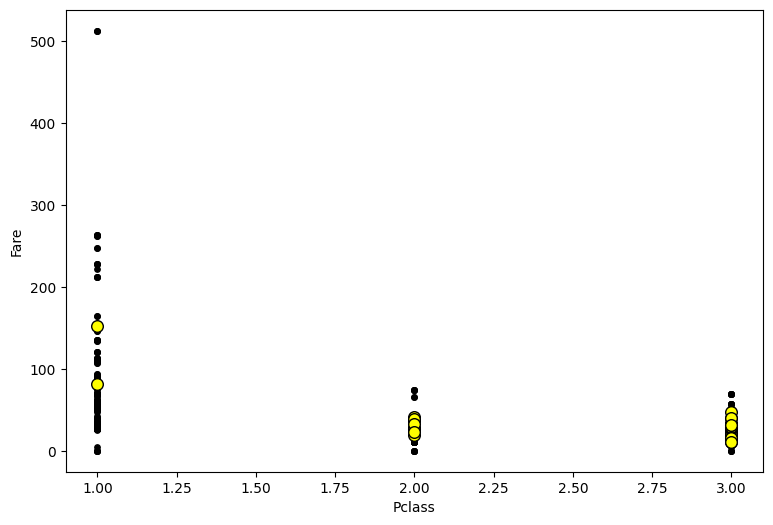

In [63]:
plt.scatter(data["Pclass"], data["Fare"],s=15, color='black')
plt.xlabel("Pclass")
plt.ylabel("Fare")

plt.scatter(children["Pclass"], children["Fare"], edgecolor='black', s=70, color='yellow')
plt.xlabel("Pclass")
plt.ylabel("Fare")

This plot shows the correlation between Fare and Pclass. The black plot is created from all data, the yellow one is from data about children. We can see that children were mainly in the second and third class.